## **Import thư viện và data**

In [18]:
from keras.datasets import mnist
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sn

## **Load data và preprocessing**

In [19]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

5


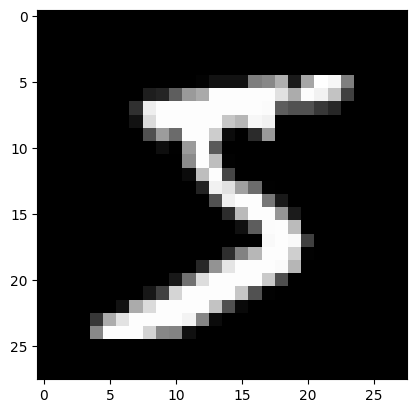

In [20]:
print(y_train[0])
plt.imshow(X_train[0],cmap = 'gray')

## **Duỗi vector, chuẩn hoá input**

In [21]:
X_train_scaled = np.array([x.ravel()/255. for x in X_train])

X_test_scaled = np.array([x.ravel()/255. for x in X_test])

print(X_train_scaled.shape)

(60000, 784)


## **Chuẩn hoá output**

In [22]:
classes = np.unique(y_train)

y_train_onehot = np.zeros((len(y_train), len(classes)))
for i in range(len(y_train)):
    y_train_onehot[i, y_train[i]] = 1

y_test_onehot = np.zeros((len(y_test), len(classes)))
for i in range(len(y_test)):
    y_test_onehot[i, y_test[i]] = 1
print(y_train.shape)
print(y_train_onehot.shape)

(60000,)
(60000, 10)


# **Huấn luyện dữ liệu**

In [23]:
def predict(X,w):
  h = np.dot(X,w)
  softmax = np.exp(h)
  y_pred = softmax/np.sum(softmax, axis = 1, keepdims = True)
  return y_pred
def loss(X,w,y):
  y_pred = predict(X,w)
  return -np.sum(y*np.log(y_pred))/y.shape[0]
def grad(X,w,y):
  y_pred = predict(X,w)
  delta = y_pred - y
  return np.dot(X.T,delta)/X.shape[0]
def gradient_descent(X,y,lr = 0.1, epochs = 500):
  w = np.zeros((X.shape[1], y.shape[1]))
  losses = []
  for i in range(epochs):
    w-= lr*grad(X,w,y)
    l = loss(X,w,y)
    losses.append(l)
  print(f'Loss cross entropy: {loss(X,w,y)}')
  return losses, w

In [24]:
print(X_train_scaled.shape)
print(y_train_onehot.shape)

(60000, 784)
(60000, 10)


### **Tính loss**

In [25]:
losses, w = gradient_descent(X_train_scaled,y_train_onehot)

Loss cross entropy: 0.3968000714633671


### **Vẽ đồ thị Loss ban đầu**

Text(0, 0.5, 'loss')

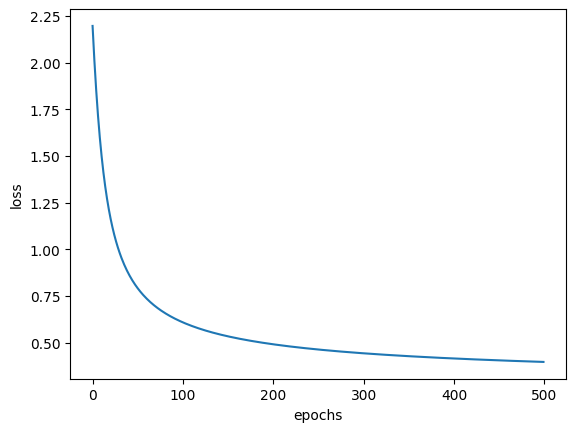

In [26]:
plt.plot(losses)
plt.xlabel("epochs")
plt.ylabel("loss")

In [27]:
# Tính y dự đoán
y_pred_onehot = predict(X_test_scaled, w)
# Tìm y dự đoán sao cho mô hình hiệu quả nhất
y_pred = np.argmax(y_pred_onehot, axis=1)

## **Hàm đánh giá**

In [28]:
def evaluation(y_test, y_pred):
    # Calculate accuracy
    accuracy = np.mean(y_pred == y_test)

    # Calculate precision and recall for each class
    precision = np.zeros(len(classes))
    recall = np.zeros(len(classes))
    for i in range(len(classes)):
        tp = np.sum((y_pred == i) & (y_test == i))
        tn = np.sum((y_pred != i) & (y_test != i))
        fp = np.sum((y_pred == i) & (y_test != i))
        fn = np.sum((y_pred != i) & (y_test == i))
    precision = tp / (tp + fp) if (tp + fp) != 0 else 0
    recall = tp / (tp + fn) if (tp + fn) != 0 else 0

    # Calculate macro-averaged precision and recall
    macro_precision = np.mean(precision)
    macro_recall = np.mean(recall)
    print(f'tp = {tp}, tn = {tn}, fp = {fp}, fn = {fn}')
    print(f'Accuracy: {accuracy}, Precision: {macro_precision}, Recall: {macro_recall}')


### **Đánh giá accuracy, recall, precision**

In [29]:
evaluation(y_test, y_pred)

tp = 879, tn = 8856, fp = 135, fn = 130
Accuracy: 0.9, Precision: 0.8668639053254438, Recall: 0.8711595639246779


# **Hàm LogisticRegression, có bổ sung bias**

In [30]:
class LogisticRegression:
    def __init__(self, lr = 1e-6, epochs = 1000):
        self.lr = lr
        self.epochs = epochs
    # Hàm thêm bias vào tập X
    def addBias(self,X):
        bias = np.ones((X.shape[0],1))
        X = np.hstack((bias,X));
        return X
    # Hàm sigmoid
    def predict(self,X,w):
        h = np.dot(X,w)
        softmax = np.exp(h)
        y_pred = softmax/np.sum(softmax, axis = 1, keepdims = True)
        return y_pred
    # Hàm loss
    def loss(self,X,w,y):
        y_pred = self.predict(X,w)
        return -np.sum(y*np.log(y_pred))/y.shape[0]
    # Hàm gradient
    def grad(self,X,w,y):
        y_pred = self.predict(X,w)
        delta = y_pred - y
        return np.dot(X.T,delta)/X.shape[0]
    # Hàm gradient descent
    def gradient_descent(self,X,y,lr = 0.1, epochs = 500):
        w = np.zeros((X.shape[1], y.shape[1]))
        losses = []
        for i in range(epochs):
          w-= lr*self.grad(X,w,y)
          l = self.loss(X,w,y)
          losses.append(l)
        print(f'Loss cross entropy: {self.loss(X,w,y)}')
        return losses, w

### **Tính loss sau khi thêm bias**

In [31]:
model = LogisticRegression()
X_train_scaled_bias = model.addBias(X_train_scaled)
X_test_scaled_bias = model.addBias(X_test_scaled)
loss,w = model.gradient_descent(X_train_scaled_bias,y_train_onehot)

Loss cross entropy: 0.39325027810607716


In [32]:
# Tính y dự đoán
y_pred = model.predict(X_test_scaled_bias,w)
# Tìm y dự đoán sao cho mô hình hiệu quả nhất
y_pred = np.argmax(y_pred_onehot, axis=1)

# **Đánh giá mô hình sau khi thêm bias**

In [33]:
evaluation(y_test,y_pred)

tp = 879, tn = 8856, fp = 135, fn = 130
Accuracy: 0.9, Precision: 0.8668639053254438, Recall: 0.8711595639246779


## **Vẽ confusion matrix dùng thư viện sklearn**



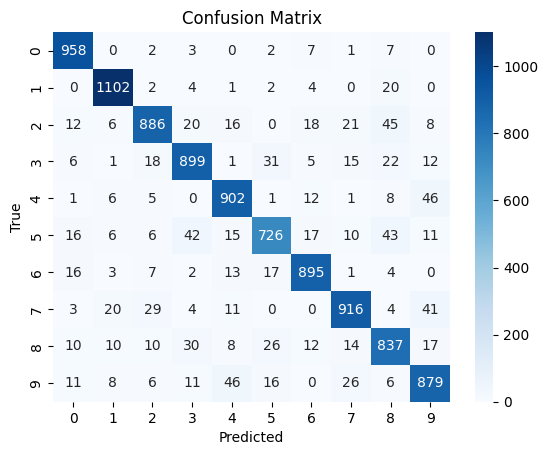

In [34]:
import sklearn.metrics

# Tạo confusion matrix
cm = sklearn.metrics.confusion_matrix(y_test, y_pred)

# Vẽ confusion matrix
plt.figure()
sn.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()